In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
customers_table_raw = pd.read_csv('data/dataset.csv')
customers_table_raw

,years-customer-register,avg-clicks-per-session,time-spent-on-app,time-spent-on-website,total-amount-spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075
...,...,...,...,...,...
495,1.820811,34.606242,11.761884,38.126520,402.167122
496,4.183144,34.238242,11.550300,35.769330,551.023002
497,3.393903,32.047815,12.482670,35.536025,497.389558
498,4.426364,30.971676,11.731364,36.074551,494.638610


For the sake of clarity, I'll adjust the time columns names, so it indicates the time unit.

In [4]:
customers_table = customers_table_raw.copy()
customers_table.columns = ['years-customer-register', 'avg-clicks-per-session', 'minutes-spent-on-app', 'minutes-spent-on-website', 'total-amount-spent']

In [5]:
customers_table

,years-customer-register,avg-clicks-per-session,minutes-spent-on-app,minutes-spent-on-website,total-amount-spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075
...,...,...,...,...,...
495,1.820811,34.606242,11.761884,38.126520,402.167122
496,4.183144,34.238242,11.550300,35.769330,551.023002
497,3.393903,32.047815,12.482670,35.536025,497.389558
498,4.426364,30.971676,11.731364,36.074551,494.638610


In [6]:
customers_table.describe()

,years-customer-register,avg-clicks-per-session,minutes-spent-on-app,minutes-spent-on-website,total-amount-spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.533462,33.053194,12.052488,37.060445,499.314038
std,0.999278,0.992563,0.994216,1.010489,79.314782
min,0.269901,29.532429,8.508152,33.913847,256.670582
25%,2.930450,32.341822,11.388153,36.349257,445.038277
50%,3.533975,33.082008,11.983231,37.069367,498.887875
75%,4.126502,33.711985,12.753850,37.716432,549.313828
max,6.922689,36.139662,15.126994,40.005182,765.518462


In [7]:
customers_table.isnull().values.any()

False

---

### Exploratory Analysis

Here will do simple data analysis, just so we can capture some patterns within the data.

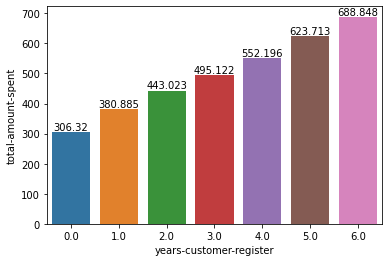

In [8]:
spending_by_years_registered = customers_table[['years-customer-register', 'total-amount-spent']].copy()
spending_by_years_registered.loc[:,'years-customer-register'] = spending_by_years_registered.loc[:,'years-customer-register'].apply(np.floor)
spending_by_years_registered = spending_by_years_registered.groupby('years-customer-register').mean().reset_index()

ax = sns.barplot(data=spending_by_years_registered, x='years-customer-register', y='total-amount-spent')
ax = ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='minutes-spent-on-app', ylabel='total-amount-spent'>

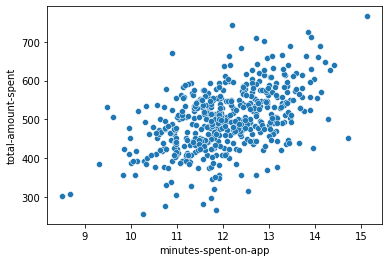

In [9]:
sns.scatterplot(customers_table, x='minutes-spent-on-app', y='total-amount-spent')

<AxesSubplot:xlabel='minutes-spent-on-website', ylabel='total-amount-spent'>

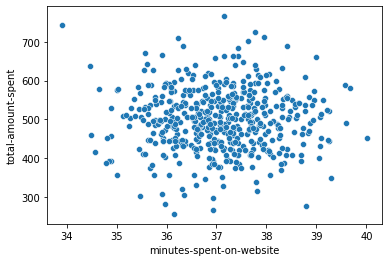

In [10]:
sns.scatterplot(customers_table, x='minutes-spent-on-website', y='total-amount-spent')

Now that's some intresting results! We can see that people tend to spend way more time on the website than on the app, and that minutes spent on the app has a bigger (and more positive) correlation with the total amount spent, than minutes spent on the website has with the total amount spent.

---

### Building models

On to what matters, let's build our first model.

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
X_unsplit = customers_table.drop(columns='total-amount-spent')
y_unsplit = customers_table['total-amount-spent']
X_train, X_test, y_train, y_test = train_test_split(X_unsplit, y_unsplit, test_size=0.3, random_state=42)

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
first_model_test_prediction = linear_model.predict(X_test)

print(f"""Test scores:
MAE: {mean_absolute_error(y_test, first_model_test_prediction)}
RMSE: {np.sqrt(mean_squared_error(y_test, first_model_test_prediction))}
R2: {r2_score(y_test, first_model_test_prediction)}""")

Test scores:
MAE: 7.846872046461797
RMSE: 9.950881133248888
R2: 0.9839920743839589


Ok, that's an almost perfect model, both the train and test scores are on point. Let's try other models.

In [14]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_model_prediction = ridge_model.predict(X_test)

print(f"""Test scores:
MAE: {mean_absolute_error(y_test, ridge_model_prediction)}
RMSE: {np.sqrt(mean_squared_error(y_test, ridge_model_prediction))}
R2: {r2_score(y_test, ridge_model_prediction)}""")

Test scores:
MAE: 7.8449324124386415
RMSE: 9.93989100710135
R2: 0.9840274143640405


We got a slight improvement!

In [15]:
ridgecv_model = RidgeCV()
ridgecv_model.fit(X_train, y_train)
ridgecv_model_prediction = ridgecv_model.predict(X_test)

print(f"""Test scores:
MAE: {mean_absolute_error(y_test, ridgecv_model_prediction)}
RMSE: {np.sqrt(mean_squared_error(y_test, ridgecv_model_prediction))}
R2: {r2_score(y_test, ridgecv_model_prediction)}""")

Test scores:
MAE: 7.846644843378763
RMSE: 9.949561024133637
R2: 0.9839963214062101


And the improvement is gone... On to the next model!

In [16]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_model_prediction = lasso_model.predict(X_test)

print(f"""Test scores:
MAE: {mean_absolute_error(y_test, lasso_model_prediction)}
RMSE: {np.sqrt(mean_squared_error(y_test, lasso_model_prediction))}
R2: {r2_score(y_test, lasso_model_prediction)}""")

Test scores:
MAE: 8.051714300961066
RMSE: 10.083356116088499
R2: 0.9835630137550018


We got a winner, ridge_model presented the best overall results! Now we can move on to the next step.

---

### Predictions

We have our best model, now we need to predict how an improvement on either the "app time" or the "website time" will affect the total amount spent by a client. To do this, first we'll get the mean values from the historical data, after that we can try different scenarios, where we will change the usage time on both platforms, and see which one present the best results.  

In [17]:
customers_table.mean()

years-customer-register       3.533462
avg-clicks-per-session       33.053194
minutes-spent-on-app         12.052488
minutes-spent-on-website     37.060445
total-amount-spent          499.314038
dtype: float64

In [18]:
current_values = np.array([[3.533462, 33.053194, 12.052488, 37.060445]])
current_prediction = ridge_model.predict(current_values)
current_prediction

array([499.04076385])

At the moment, using the current mean values, we have a prediction of 499.04 USD, it's a bit lower than the true total amount mean, but since we'll be comparing predictions, I think it's a good idea if all the values we use for comparison are predictions, including the current value.

In [19]:
scenarios = [{'scenario':'Current values', 'variable':'None','prediction':current_prediction.item()}]
increase_rates = [0.01, 0.03, 0.05, 0.10]
platforms_variables = ['minutes-spent-on-app', 'minutes-spent-on-website']

for index, platform in enumerate(platforms_variables):
    platform_index = index + 2

    for rate in increase_rates:
        input_values = current_values.copy()
        input_values[0][platform_index] = input_values[0][platform_index] * (rate + 1)

        prediction = ridge_model.predict(input_values)

        scenario = {'scenario':f'{rate*100}% increase in {platform}', 'variable': platform, 'prediction': prediction.item()}
        scenarios.append(scenario)


In [20]:
scenarios_table = pd.DataFrame(scenarios)
scenarios_table

,scenario,variable,prediction
0,Current values,None,499.040764
1,1.0% increase in minutes-spent-on-app,minutes-spent-on-app,503.639704
2,3.0% increase in minutes-spent-on-app,minutes-spent-on-app,512.837585
3,5.0% increase in minutes-spent-on-app,minutes-spent-on-app,522.035466
4,10.0% increase in minutes-spent-on-app,minutes-spent-on-app,545.030167
5,1.0% increase in minutes-spent-on-website,minutes-spent-on-website,499.201218
6,3.0% increase in minutes-spent-on-website,minutes-spent-on-website,499.522127
7,5.0% increase in minutes-spent-on-website,minutes-spent-on-website,499.843036
8,10.0% increase in minutes-spent-on-website,minutes-spent-on-website,500.645307


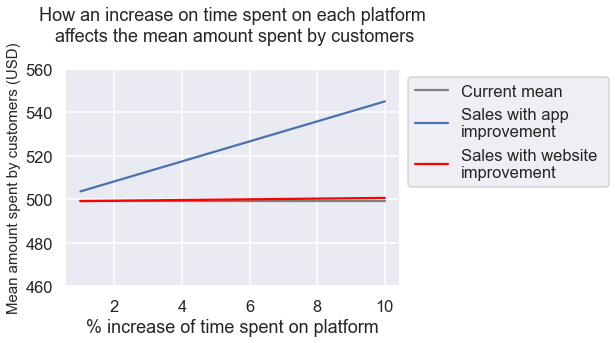

In [123]:
app_scenarios = scenarios_table[scenarios_table['variable']=='minutes-spent-on-app'].copy()
website_scenarios = scenarios_table[scenarios_table['variable']=='minutes-spent-on-website'].copy()

plt.ylim(460,560)

sns.lineplot(x=[1,3,5,10], y=[499,499,499,499], color='grey')
sns.lineplot(data=app_scenarios, x=[1,3,5,10], y='prediction')
ax = sns.lineplot(data=website_scenarios, x=[1,3,5,10], y='prediction', color='red')

plt.ylabel('Mean amount spent by customers (USD)', fontsize='small')
plt.xlabel('% increase of time spent on platform', fontsize='medium')
plt.title('How an increase on time spent on each platform\n affects the mean amount spent by customers', y=1.10)
plt.legend(loc= 'upper right', labels=['Current mean', 'Sales with app \nimprovement', 'Sales with website \nimprovement'])
sns.move_legend(ax, loc='best',bbox_to_anchor = (1,1))

sns.set_theme()
sns.set_context('talk')
plt.show()

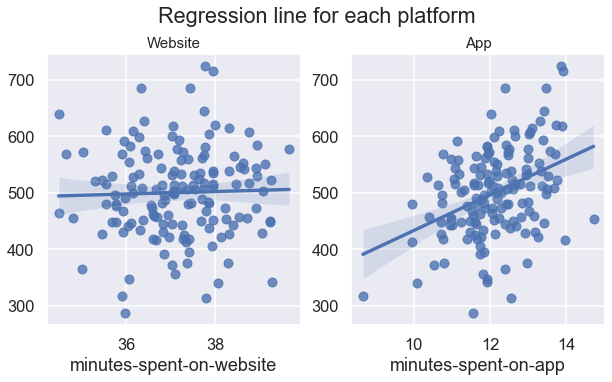

In [124]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

sns.regplot(data=X_test, x='minutes-spent-on-website', y=ridge_model_prediction, ax=axs[0])
sns.regplot(data=X_test, x='minutes-spent-on-app', y=ridge_model_prediction, ax=axs[1])

fig.suptitle('Regression line for each platform', y=1.01)
axs[0].set_title('Website', fontsize='small')
axs[1].set_title('App', fontsize='small')

plt.show()

Conclusion: If we increase by **1%** the **time spent** by user on the **app**, the **sales** would increase by **0.9%**, while on the **website** the **sales** would only increase by **0.04%**. If we take it to a more positive scenario, let's say we gave a **10% increase on time spent on each platform**, when we talk about the **app** that would represent a **9% increase on sales**, while on **the website** the sales would increase only by **0.3%.**

Considering this scenarios, **the best choice for the company would be to improve their app.**